# **DATA UNDERSTANDING**

## **Brief Background**

In this project, I use Northwind SQL dataset to analyse the data where the customers as my key analysis. This database describes a company that sells specialty foods wholesale to retail outlets worldwide which is a fictious database for a consumer products company that has offices in the Seattle, Washington, USA and London, British Isles.

Data will be explored that will reveal business related questions and each question will be answered using Hypothesis Testing. Throughout this process, valuable knowledge will be gained and based on the results of the tests, conclusions and recommendations will be offered.

## **Database Information**

Northwind database contains 13 tables:
- Employee                : Describes an information about Northwind's employees.
- Employee Territory      : Describes an information about the territory where the employees based. 
- Territory               : Provides an information about territory description to represent TerritoryID key.
- Region                  : Provides a region description to represent RegionID.
- Orders                  : Provides an information about the orders details from customers in the whole region.
- OrderDetails            : Provides an information about the unit price per quantity and product discount.
- Shippers                : Provides an information about the shipper's name.
- Products                : Provides information about the product details such as product category, unit price, etc.
- Categories              : You will find the categorie names of Northwind's producs
- Customers               : Provides more details about Northwind's customers.
- CustomerDemographics    : No data shown here.
- CustomerCustomerDemo    : No data shown here.
- Suppliers               : Provides more details about Northwind's customers.

Each tables shown above is all connected, either direct or indirect, therefore all information of each tables are related to each other.

# Business Context and Problem Statement
In this analysis, the main objective is to extract insights from the data which could facilitate valuable information such as profit growth for the company. Two things which are generally good for business are **the customers** 1) buying more products, and 2) buying more often. 

Since the customers of Northwind are retailers, a discount on their order means a higher profit margin for them, potentially generating buyer incentive as well as customer loyalty. So here I'd like to investigate further situation in Nortwhind that oriented to their customer behaviour by answering questions below: 

- How is the current condition of the sales growth over the period in Northwind? 
- Who is the top 5 loyal customers over the period based on the amount or orders they've made?
- Who is the top 5 customers based the total amount of their purchase?
- Which product category that purchased by customers the most? 
- Does customer's purchase amount and delivery process days has a significant correlation to the company's profit?
- What are best selling products by quantities amount that ordered by the customers?
- Who is the top employess or salesperson who made revenue the most based in the number of clients they have?

# **DATABASE**

## **Connecting To Database**

Before we start analysing data, the first step to do is to connect the SQL database in Jupyter Notebook. As I mentioned before, I will use ``Northwind`` database. By doing this process, we will get full access to all tables from the database.


In [1]:
import pandas as pd
import numpy as np
import mysql.connector 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
mydb = mysql.connector.connect(
host = 'localhost',
user = 'root',
passwd = 'France88!',
database = 'Northwind')

In [3]:
kursor = mydb.cursor()
def df_sql(query) :
    kursor.execute(query)
    hasil = kursor.fetchall()
    data = pd.DataFrame(data = hasil, columns = kursor.column_names)
    return data

## **Data Collection**

Since the customer is my key analysis that mainly oriented to products, orders, and order details, I would like to join these 4 tables in the database into one general table which are Customers, Employees, Orders, Order's Details, and Products.


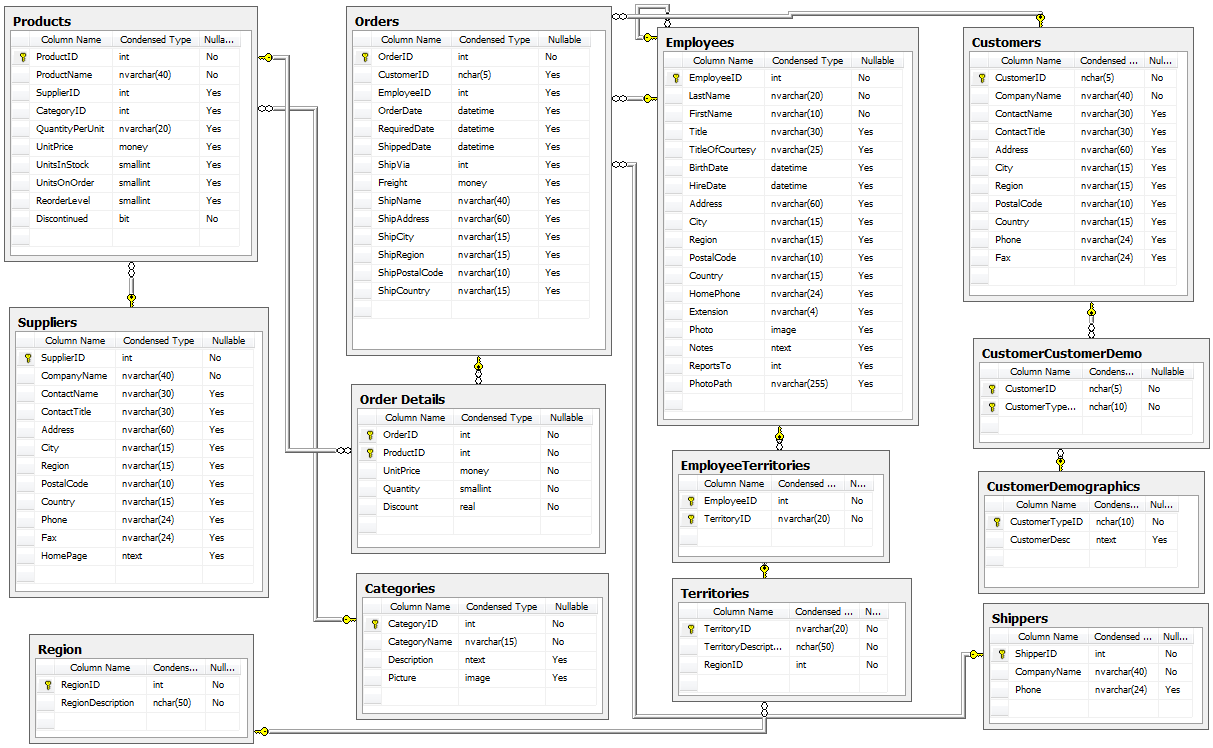

In [26]:
%matplotlib inline
from IPython.display import Image
Image('/Users/kponeva/Documents/Courses/Data Science/JC Data Science Purwadhika/Module 2/Capstone Module 2/Northwind_ERD.png')

Each tables that I will select as main data will have several columns which more necessary than other columns. The selected information as follows:
- CustomerID from table 'customers'
- CompanyName from table 'customers'
- City from table 'customers'
- Country from table 'customers'
- Region from table 'customers'
- OrderID from table 'orders'
- OrderDate from table 'orders'
- RequiredDate from table 'orders'
- ShippedDate from table 'orders'
- Quantity from table 'Order Details'
- UnitPrice from table 'Order Details'
- ProductName from table 'Products'
- QuantityPerUnit from table 'Products'
- UnitPrice from table 'Products'
- CategoryName from table 'Categories'
- UnitsInStock from table 'Products'
- UnitsOnOrder from table 'Products'
- UnitPrice from table 'Products'
- CompanyName from table 'Suppliers' 


In [4]:
df_main = df_sql('''
    SELECT c.CustomerId, c.CompanyName AS Customer, c.City, c.Country, c.Region, e.LastName Salesperson,
	    o.OrderDate, o.OrderId, o.RequiredDate, o.ShippedDate,
        od.Quantity, od.UnitPrice SellingPrice, (od.Quantity * od.UnitPrice) TotalPurchase, Round(p.UnitPrice - od.UnitPrice, 2) ProfitEach,
        p.ProductName, ct.CategoryName ProductLine, p.QuantityPerUnit, p.UnitPrice BuyingPrice, s.CompanyName Supplier, 
        (p.UnitsInStock - p.UnitsOnOrder) RemainingStock
    FROM customers c
    LEFT JOIN orders o on c.CustomerID = o.CustomerID
    LEFT JOIN orderdetails od on o.OrderID = od.OrderID
    LEFT JOIN products p on od.ProductID = p.ProductID
    LEFT JOIN employees e on o.EmployeeID = e.EmployeeID
    LEFT JOIN categories ct on p.CategoryID = ct.CategoryID
    LEFT JOIN suppliers s on p.SupplierID = s.SupplierID; 
''')
df_main

,CustomerId,Customer,City,Country,Region,Salesperson,OrderDate,OrderId,RequiredDate,ShippedDate,Quantity,SellingPrice,TotalPurchase,ProfitEach,ProductName,ProductLine,QuantityPerUnit,BuyingPrice,Supplier,RemainingStock
0,ALFKI,Alfreds Futterkiste,Berlin,Germany,None,Suyama,1997-08-25,10643.0,1997-09-22,1997-09-02,15.0,45.6000,684.0000,0.00,Rssle Sauerkraut,Produce,25 - 825 g cans,45.6000,Plutzer Lebensmittelgromrkte AG,26.0
1,ALFKI,Alfreds Futterkiste,Berlin,Germany,None,Suyama,1997-08-25,10643.0,1997-09-22,1997-09-02,21.0,18.0000,378.0000,0.00,Chartreuse verte,Beverages,750 cc per bottle,18.0000,Aux joyeux ecclsiastiques,69.0
2,ALFKI,Alfreds Futterkiste,Berlin,Germany,None,Suyama,1997-08-25,10643.0,1997-09-22,1997-09-02,2.0,12.0000,24.0000,0.00,Spegesild,Seafood,4 - 450 g glasses,12.0000,Lyngbysild,95.0
3,ALFKI,Alfreds Futterkiste,Berlin,Germany,None,Peacock,1997-10-03,10692.0,1997-10-31,1997-10-13,20.0,43.9000,878.0000,0.00,Vegie-spread,Condiments,15 - 625 g jars,43.9000,"Pavlova, Ltd.",24.0
4,ALFKI,Alfreds Futterkiste,Berlin,Germany,None,Peacock,1997-10-13,10702.0,1997-11-24,1997-10-21,6.0,10.0000,60.0000,0.00,Aniseed Syrup,Condiments,12 - 550 ml bottles,10.0000,Exotic Liquids,-57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WOLZA,Wolski Zajazd,Warszawa,Poland,None,Callahan,1998-04-03,10998.0,1998-04-17,1998-04-17,12.0,4.5000,54.0000,0.00,Guaran Fantstica,Beverages,12 - 355 ml cans,4.5000,Refrescos Americanas LTDA,20.0
2155,WOLZA,Wolski Zajazd,Warszawa,Poland,None,Callahan,1998-04-03,10998.0,1998-04-17,1998-04-17,7.0,28.5000,199.5000,0.00,Sirop d'rable,Condiments,24 - 500 ml bottles,28.5000,Forts d'rables,113.0
2156,WOLZA,Wolski Zajazd,Warszawa,Poland,None,Callahan,1998-04-03,10998.0,1998-04-17,1998-04-17,20.0,10.0000,200.0000,0.00,Longlife Tofu,Produce,5 kg pkg.,10.0000,Tokyo Traders,-16.0
2157,WOLZA,Wolski Zajazd,Warszawa,Poland,None,Callahan,1998-04-03,10998.0,1998-04-17,1998-04-17,30.0,7.7500,232.5000,0.00,Rhnbru Klosterbier,Beverages,24 - 0.5 l bottles,7.7500,Plutzer Lebensmittelgromrkte AG,125.0


# **DATA MANIPULATION**

'df_main' is the main dataset that I will use in this analysis. Before I proceed further, I need to check more details especially the anomalies that found in the data. If we find outliers data or missing values, then we need to find some solutions to clean the data. During this process, data will need to be adjusted until the final output indicates as a clean dataset before it's analysed through data visualisation and statictice testing.

## **Dataset in General**

Based on the brief info above, it shows that the dataset has 2159 rows and 20 columns. Each columns have different types of data such as: object, integer, datetime, and float. 

Now, let's take a look the non-null values or the data that has its values. According to the result, not all columns or features have complete values. There are some missing values that are still possible to adjust.   

The next focus is to pay attention on the features below: 
1. Total Purchase
2. BuyingPrice
3. ProductPrice
3. Profit
4. RequiredDate
5. ShippedDate

Our next step is to analyse the situation between these features. The type of data for BuyingPrice, ProductPrice, and Profit have to be numeric which already stated as it is in the info.

Secondly, the features on RequiredDate and ShippedDate. Both features are already shown as ```datetime``` type. 

In conclusion, we don't have to change anything on the features. 

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerId       2159 non-null   object        
 1   Customer         2159 non-null   object        
 2   City             2157 non-null   object        
 3   Country          2157 non-null   object        
 4   Region           826 non-null    object        
 5   Salesperson      2155 non-null   object        
 6   OrderDate        2155 non-null   datetime64[ns]
 7   OrderId          2155 non-null   float64       
 8   RequiredDate     2155 non-null   datetime64[ns]
 9   ShippedDate      2082 non-null   datetime64[ns]
 10  Quantity         2155 non-null   float64       
 11  SellingPrice     2155 non-null   object        
 12  TotalPurchase    2155 non-null   object        
 13  ProfitEach       2155 non-null   object        
 14  ProductName      2155 non-null   object 

In [6]:
df_main.isnull().sum()

CustomerId            0
Customer              0
City                  2
Country               2
Region             1333
Salesperson           4
OrderDate             4
OrderId               4
RequiredDate          4
ShippedDate          77
Quantity              4
SellingPrice          4
TotalPurchase         4
ProfitEach            4
ProductName           4
ProductLine           4
QuantityPerUnit       4
BuyingPrice           4
Supplier              4
RemainingStock        4
dtype: int64

In [7]:
df_main.shape

(2159, 20)

## **Missing Values**

As explained before, there are features that have missing values. None of them that have large null values except 'Region' of Customers. Therefore, we still need to overcome the other null values by dropping them out of the table for the portion of its missing values still below 5%. It means that the dropped nan values would not have significant decrease. For null values rate above 50% is better to be eliminated. 

## **Handling Anomalies**

After we look at where the missing values, we should overcome this situation. it's obviously we just need to drop the null values of each rows.

In [8]:
# Remove Missing Value above 50%

df_main.drop(['Region'], axis=1, inplace = True)

In [9]:
#remove missing values
df_main.dropna(inplace = True)

## **Recheck Missing Value Information**

After dropping the missing values in each rows, the next step is to check the data again to make sure if there are still missing values found in the features. By looking at the result above, it's clearly to be seen that there are no missing values. Each features now have 0 Nan values which means the missing values probem is under control.

In [10]:
#recheck info
df_main.isnull().sum()

CustomerId         0
Customer           0
City               0
Country            0
Salesperson        0
OrderDate          0
OrderId            0
RequiredDate       0
ShippedDate        0
Quantity           0
SellingPrice       0
TotalPurchase      0
ProfitEach         0
ProductName        0
ProductLine        0
QuantityPerUnit    0
BuyingPrice        0
Supplier           0
RemainingStock     0
dtype: int64

## **Data Duplicate**

Another anomalies need to be checked is the duplicate data. As we all know that data anomalies will one of factors that will be an obstacle during analysis. If we spot any duplicate data, the best thing to do is to delete it and let the other unique values leave as it is. in this current data, the outpput below indicated there is none of duplicated data. Therefore, no further action needed.

In [11]:
# Check Dupliacate

df_main[df_main.duplicated()]

,CustomerId,Customer,City,Country,Salesperson,OrderDate,OrderId,RequiredDate,ShippedDate,Quantity,SellingPrice,TotalPurchase,ProfitEach,ProductName,ProductLine,QuantityPerUnit,BuyingPrice,Supplier,RemainingStock


## **Feature 'ProcessingDate'**

The selected data shows 2 features which typed as ```datetime```. It means that we can extract more details from both features. Previously, we need to be aware the meaning of both features. ```RequiredDate``` is defined as time or when the products are needed, while the ```ShippedDate``` is defined as the delivery time of the products.

By understanding these definition, we can make a conclusion that how long woould take to send the products before the deadline of delivery. With this in mind, to get the details of this, we need to substract between these columns. Now we come up with another question: can we substract time? Of course we can. 


In [12]:
# Add New Column (Processing Day)

df_main['ProcessingDays'] = df_main['RequiredDate'] - df_main['ShippedDate']
df_main.sample(5)

,CustomerId,Customer,City,Country,Salesperson,OrderDate,OrderId,RequiredDate,ShippedDate,Quantity,SellingPrice,TotalPurchase,ProfitEach,ProductName,ProductLine,QuantityPerUnit,BuyingPrice,Supplier,RemainingStock,ProcessingDays
174,BONAP,Bon app',Marseille,France,Peacock,1997-03-11,10470.0,1997-04-08,1997-03-14,30.0,50.0000,1500.0000,12.50,Carnarvon Tigers,Seafood,16 kg pkg.,62.5000,"Pavlova, Ltd.",42.0,25 days
1762,SEVES,Seven Seas Imports,London,UK,King,1997-05-01,10523.0,1997-05-29,1997-05-30,18.0,26.0000,468.0000,0.00,Gravad lax,Seafood,12 - 500 g pkgs.,26.0000,Svensk Sjfda AB,-39.0,-1 days
1269,PICCO,Piccolo und mehr,Salzburg,Austria,King,1997-07-11,10597.0,1997-08-08,1997-07-18,35.0,4.5000,157.5000,0.00,Guaran Fantstica,Beverages,12 - 355 ml cans,4.5000,Refrescos Americanas LTDA,20.0,21 days
1987,VICTE,Victuailles en stock,Lyon,France,Leverling,1998-01-05,10814.0,1998-02-02,1998-01-14,20.0,46.0000,920.0000,0.00,Ipoh Coffee,Beverages,16 - 500 g tins,46.0000,Leka Trading,7.0,19 days
690,GREAL,Great Lakes Food Market,Eugene,USA,Suyama,1997-09-04,10656.0,1997-10-02,1997-09-10,28.0,19.4500,544.6000,0.00,Gula Malacca,Condiments,20 - 2 kg bags,19.4500,Leka Trading,27.0,22 days


## **Unique Value 'ProcessingDays'**

Now, after a new column created called the```ProcessingDays``, let's check further info about it. The result above shows there is no anomalies in the column. Then, how to find much deeper information in here? Take a look the output below that telling us about the total of its unique values.

In [13]:
# Check Data Anomalies in Date Time Fomrat

df_main['ProcessingDays'].value_counts()

21 days     227
22 days     191
23 days     165
25 days     160
19 days     159
24 days     158
26 days     145
20 days     139
18 days      98
16 days      39
10 days      37
7 days       37
27 days      35
17 days      34
5 days       31
36 days      31
8 days       30
4 days       27
9 days       24
35 days      23
34 days      23
11 days      22
6 days       21
-1 days      20
13 days      18
39 days      16
-7 days      16
-6 days      15
32 days      15
15 days      15
3 days       11
0 days       10
14 days       8
-4 days       8
-5 days       6
33 days       6
-2 days       6
1 days        6
30 days       6
-16 days      5
12 days       5
2 days        5
37 days       5
-9 days       4
-18 days      4
41 days       3
38 days       3
-3 days       2
-8 days       2
28 days       2
-11 days      2
-17 days      1
-23 days      1
Name: ProcessingDays, dtype: int64

## **Anomaly on ```Processing Days```**

Since the output shows us there are many unique values of each values, we also find something irregular which is time with negative values such as -1, -11, -17, -23 days. 
Actually, there are 2 assumptions to explain this situation. The first one is just a pure mistake when they input into the database. The second assumption is perhaps due to overdue delivery time.

In the first assumption, we can drop all these data to remove the anomalies. We consider that this data is just a mistake and can be removed due to small number of error values. In the second assumption, we can keep this data and using it for analysis to find where the issues are.

In here, we will use the second assumption in which it's assumed as delayed delivery. Next, we will do this analysis. 


In [14]:
# Handling Date Time Format Anomalies (Check Data First)

df_main[df_main['ProcessingDays'] <= '0 days']

,CustomerId,Customer,City,Country,Salesperson,OrderDate,OrderId,RequiredDate,ShippedDate,Quantity,SellingPrice,TotalPurchase,ProfitEach,ProductName,ProductLine,QuantityPerUnit,BuyingPrice,Supplier,RemainingStock,ProcessingDays
73,BERGS,Berglunds snabbkp,Lule,Sweden,Fuller,1996-08-14,10280.0,1996-09-11,1996-09-12,12.0,3.6000,43.2000,0.90,Guaran Fantstica,Beverages,12 - 355 ml cans,4.5000,Refrescos Americanas LTDA,20.0,-1 days
74,BERGS,Berglunds snabbkp,Lule,Sweden,Fuller,1996-08-14,10280.0,1996-09-11,1996-09-12,20.0,19.2000,384.0000,4.80,Pt chinois,Meat/Poultry,24 boxes x 2 pies,24.0000,Ma Maison,115.0,-1 days
75,BERGS,Berglunds snabbkp,Lule,Sweden,Fuller,1996-08-14,10280.0,1996-09-11,1996-09-12,30.0,6.2000,186.0000,1.55,Rhnbru Klosterbier,Beverages,24 - 0.5 l bottles,7.7500,Plutzer Lebensmittelgromrkte AG,125.0,-1 days
118,BERGS,Berglunds snabbkp,Lule,Sweden,Leverling,1998-03-04,10924.0,1998-04-01,1998-04-08,20.0,31.0000,620.0000,0.00,Ikura,Seafood,12 - 200 ml jars,31.0000,Tokyo Traders,31.0,-7 days
119,BERGS,Berglunds snabbkp,Lule,Sweden,Leverling,1998-03-04,10924.0,1998-04-01,1998-04-08,30.0,45.6000,1368.0000,0.00,Rssle Sauerkraut,Produce,25 - 825 g cans,45.6000,Plutzer Lebensmittelgromrkte AG,26.0,-7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,WHITC,White Clover Markets,Seattle,USA,Callahan,1997-07-11,10596.0,1997-08-08,1997-08-12,30.0,7.7500,232.5000,0.00,Rhnbru Klosterbier,Beverages,24 - 0.5 l bottles,7.7500,Plutzer Lebensmittelgromrkte AG,125.0,-4 days
2154,WOLZA,Wolski Zajazd,Warszawa,Poland,Callahan,1998-04-03,10998.0,1998-04-17,1998-04-17,12.0,4.5000,54.0000,0.00,Guaran Fantstica,Beverages,12 - 355 ml cans,4.5000,Refrescos Americanas LTDA,20.0,0 days
2155,WOLZA,Wolski Zajazd,Warszawa,Poland,Callahan,1998-04-03,10998.0,1998-04-17,1998-04-17,7.0,28.5000,199.5000,0.00,Sirop d'rable,Condiments,24 - 500 ml bottles,28.5000,Forts d'rables,113.0,0 days
2156,WOLZA,Wolski Zajazd,Warszawa,Poland,Callahan,1998-04-03,10998.0,1998-04-17,1998-04-17,20.0,10.0000,200.0000,0.00,Longlife Tofu,Produce,5 kg pkg.,10.0000,Tokyo Traders,-16.0,0 days


## **Preview Cleaned Data**

After we handled the anomalies, we now have much better data. See below, the sample of data that has been adjusted after going through several process.

In [15]:
# Clean Data

df_main.sample(20)

,CustomerId,Customer,City,Country,Salesperson,OrderDate,OrderId,RequiredDate,ShippedDate,Quantity,SellingPrice,TotalPurchase,ProfitEach,ProductName,ProductLine,QuantityPerUnit,BuyingPrice,Supplier,RemainingStock,ProcessingDays
53,AROUT,Around the Horn,London,UK,Peacock,1997-10-16,10707.0,1997-10-30,1997-10-23,28.0,15.0000,420.0000,0.00,Outback Lager,Beverages,24 - 355 ml bottles,15.0000,"Pavlova, Ltd.",5.0,7 days
1892,TORTU,Tortuga Restaurante,Mxico D.F.,Mexico,Davolio,1996-09-12,10304.0,1996-10-10,1996-09-17,10.0,44.0000,440.0000,11.00,Raclette Courdavault,Dairy Products,5 kg pkg.,55.0000,Gai pturage,79.0,23 days
155,BLONP,Blondesddsl pre et fils,Strasbourg,France,Dodsworth,1997-06-12,10566.0,1997-07-10,1997-06-18,10.0,18.0000,180.0000,0.00,Lakkalikri,Beverages,500 ml,18.0000,Karkki Oy,57.0,22 days
273,CACTU,Cactus Comidas para llevar,Buenos Aires,Argentina,Fuller,1998-01-07,10819.0,1998-02-04,1998-01-16,20.0,7.7500,155.0000,0.00,Rhnbru Klosterbier,Beverages,24 - 0.5 l bottles,7.7500,Plutzer Lebensmittelgromrkte AG,125.0,19 days
751,HILAA,HILARION-Abastos,San Cristbal,Venezuela,King,1997-03-31,10490.0,1997-04-28,1997-04-03,36.0,6.2000,223.2000,1.55,Rhnbru Klosterbier,Beverages,24 - 0.5 l bottles,7.7500,Plutzer Lebensmittelgromrkte AG,125.0,25 days
1758,SEVES,Seven Seas Imports,London,UK,Callahan,1997-03-12,10472.0,1997-04-09,1997-03-19,80.0,3.6000,288.0000,0.90,Guaran Fantstica,Beverages,12 - 355 ml cans,4.5000,Refrescos Americanas LTDA,20.0,21 days
961,LEHMS,Lehmanns Marktstand,Frankfurt a.M.,Germany,Callahan,1996-08-13,10279.0,1996-09-10,1996-08-16,15.0,31.2000,468.0000,7.80,Alice Mutton,Meat/Poultry,20 - 1 kg tins,39.0000,"Pavlova, Ltd.",0.0,25 days
2122,WHITC,White Clover Markets,Seattle,USA,Fuller,1998-04-17,11032.0,1998-05-15,1998-04-23,30.0,55.0000,1650.0000,0.00,Raclette Courdavault,Dairy Products,5 kg pkg.,55.0000,Gai pturage,79.0,22 days
772,HILAA,HILARION-Abastos,San Cristbal,Venezuela,Peacock,1998-02-23,10901.0,1998-03-23,1998-02-26,30.0,21.5000,645.0000,0.00,Flotemysost,Dairy Products,10 - 500 g pkgs.,21.5000,Norske Meierier,26.0,25 days
1951,VAFFE,Vaffeljernet,rhus,Denmark,Davolio,1997-07-07,10591.0,1997-07-21,1997-07-16,50.0,7.4500,372.5000,0.00,Tourtire,Meat/Poultry,16 pies,7.4500,Ma Maison,21.0,5 days


In [16]:
late_shipped = df_sql(''' 

    SELECT o.*, COUNT(ShippedDate) OVER () AS Late_Shipped 
    FROM Orders o 
    WHERE ShippedDate > RequiredDate''')
    
late_shipped.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Late_Shipped
0,10264,FOLKO,6,1996-07-24,1996-08-21,1996-08-23,3,3.6700,Folk och f HB,kergatan 24,Brcke,None,S-844 67,Sweden,37
1,10271,SPLIR,6,1996-08-01,1996-08-29,1996-08-30,2,4.5400,Split Rail Beer & Ale,P.O. Box 555,Lander,WY,82520,USA,37
2,10280,BERGS,2,1996-08-14,1996-09-11,1996-09-12,1,8.9800,Berglunds snabbkp,Berguvsvgen 8,Lule,None,S-958 22,Sweden,37
3,10302,SUPRD,4,1996-09-10,1996-10-08,1996-10-09,2,6.2700,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium,37
4,10309,HUNGO,3,1996-09-19,1996-10-17,1996-10-23,1,47.3000,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,Co. Cork,None,Ireland,37


## **General Info Cleaned Data**

In [17]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2158
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   CustomerId       2082 non-null   object         
 1   Customer         2082 non-null   object         
 2   City             2082 non-null   object         
 3   Country          2082 non-null   object         
 4   Salesperson      2082 non-null   object         
 5   OrderDate        2082 non-null   datetime64[ns] 
 6   OrderId          2082 non-null   float64        
 7   RequiredDate     2082 non-null   datetime64[ns] 
 8   ShippedDate      2082 non-null   datetime64[ns] 
 9   Quantity         2082 non-null   float64        
 10  SellingPrice     2082 non-null   object         
 11  TotalPurchase    2082 non-null   object         
 12  ProfitEach       2082 non-null   object         
 13  ProductName      2082 non-null   object         
 14  ProductLine      2082 no

In [18]:
# Change Spesific Column To Numeric Format

df_main['SellingPrice'] = pd.to_numeric(df_main['SellingPrice'])
df_main['TotalPurchase'] = pd.to_numeric(df_main['TotalPurchase'])
df_main['ProfitEach'] = pd.to_numeric(df_main['ProfitEach'])
df_main['BuyingPrice'] = pd.to_numeric(df_main['BuyingPrice'])

In [19]:
# Check Some Info

listItem = []
for col in df_main.columns :
    listItem.append([col, df_main[col].dtype, len(df_main),df_main[col].isna().sum(), round((df_main[col].isna().sum()/len(df_main[col])) * 100,2),
                    df_main[col].nunique(), list(df_main[col].drop_duplicates().sample(2, replace=True).values)])

df_main_desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_main_desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,CustomerId,object,2082,0,0.0,89,"[LAZYK, VAFFE]"
1,Customer,object,2082,0,0.0,89,"[Ricardo Adocicados, Comrcio Mineiro]"
2,City,object,2082,0,0.0,69,"[Bern, Salzburg]"
3,Country,object,2082,0,0.0,21,"[Poland, Venezuela]"
4,Salesperson,object,2082,0,0.0,9,"[Buchanan, Dodsworth]"
5,OrderDate,datetime64[ns],2082,0,0.0,478,"[1996-10-04T00:00:00.000000000, 1997-01-13T00:..."
6,OrderId,float64,2082,0,0.0,809,"[10510.0, 10348.0]"
7,RequiredDate,datetime64[ns],2082,0,0.0,450,"[1998-05-01T00:00:00.000000000, 1997-06-02T00:..."
8,ShippedDate,datetime64[ns],2082,0,0.0,387,"[1996-07-22T00:00:00.000000000, 1998-04-20T00:..."
9,Quantity,float64,2082,0,0.0,54,"[50.0, 66.0]"


# **DATA VISUALISATION & STATISTICS**

## **Data Outlier & Normal Distribution Test**

As I will use `Total Purchase` often in the analysis as variable, I am going to test the distribution by using hypothesis and graph. Besides, we need to see how many outliers data for this variable. 

In [20]:
# Outlier Check With Function

q1 = df_main['TotalPurchase'].describe()['25%']
q3 = df_main['TotalPurchase'].describe()['75%']
iqr = q3 - q1

outlier_index = df_main[(df_main['TotalPurchase'] < q1 - (1.5 * iqr)) | (df_main['TotalPurchase']> q3 + (1.5 * iqr)) ].index
not_outlier_index = df_main[(df_main['TotalPurchase'] > q1 - (1.5 * iqr)) & (df_main['TotalPurchase']< q3 + (1.5 * iqr)) ].index
df_main.loc[outlier_index]

,CustomerId,Customer,City,Country,Salesperson,OrderDate,OrderId,RequiredDate,ShippedDate,Quantity,SellingPrice,TotalPurchase,ProfitEach,ProductName,ProductLine,QuantityPerUnit,BuyingPrice,Supplier,RemainingStock,ProcessingDays
65,AROUT,Around the Horn,London,UK,Dodsworth,1998-03-16,10953.0,1998-03-30,1998-03-25,50.0,81.0,4050.0,0.00,Sir Rodney's Marmalade,Confections,30 gift boxes,81.00,"Specialty Biscuits, Ltd.",40.0,5 days
76,BERGS,Berglunds snabbkp,Lule,Sweden,Leverling,1996-12-16,10384.0,1997-01-13,1996-12-20,28.0,64.8,1814.4,16.20,Sir Rodney's Marmalade,Confections,30 gift boxes,81.00,"Specialty Biscuits, Ltd.",40.0,24 days
86,BERGS,Berglunds snabbkp,Lule,Sweden,Davolio,1997-05-01,10524.0,1997-05-29,1997-05-07,60.0,46.0,2760.0,0.00,Ipoh Coffee,Beverages,16 - 500 g tins,46.00,Leka Trading,7.0,22 days
98,BERGS,Berglunds snabbkp,Lule,Sweden,Dodsworth,1997-09-17,10672.0,1997-10-01,1997-09-26,15.0,263.5,3952.5,0.00,Cte de Blaye,Beverages,12 - 75 cl bottles,263.50,Aux joyeux ecclsiastiques,17.0,5 days
140,BLONP,Blondesddsl pre et fils,Strasbourg,France,Peacock,1996-11-22,10360.0,1996-12-20,1996-12-02,35.0,99.0,3465.0,24.79,Thringer Rostbratwurst,Meat/Poultry,50 bags x 30 sausgs.,123.79,Plutzer Lebensmittelgromrkte AG,0.0,18 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,WHITC,White Clover Markets,Seattle,USA,Peacock,1996-11-01,10344.0,1996-11-29,1996-11-05,70.0,32.0,2240.0,8.00,Northwoods Cranberry Sauce,Condiments,12 - 12 oz jars,40.00,Grandma Kelly's Homestead,6.0,24 days
2113,WHITC,White Clover Markets,Seattle,USA,Peacock,1998-01-30,10861.0,1998-02-27,1998-02-17,42.0,39.0,1638.0,0.00,Alice Mutton,Meat/Poultry,20 - 1 kg tins,39.00,"Pavlova, Ltd.",0.0,10 days
2119,WHITC,White Clover Markets,Seattle,USA,Leverling,1998-02-24,10904.0,1998-03-24,1998-02-27,35.0,49.3,1725.5,0.00,Tarte au sucre,Confections,48 pies,49.30,Forts d'rables,17.0,25 days
2121,WHITC,White Clover Markets,Seattle,USA,Fuller,1998-04-17,11032.0,1998-05-15,1998-04-23,25.0,263.5,6587.5,0.00,Cte de Blaye,Beverages,12 - 75 cl bottles,263.50,Aux joyeux ecclsiastiques,17.0,22 days


**Data Outliers:** for `TotalPurchase` column has affected 150 rows of data which means it's considerable amount of data outliers. Below is the boxplot to explain where the data outliers spread out. It seems that the the boxplot skewness is positive, In statistics, a positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

In [21]:
fig = px.box(df_main, x="TotalPurchase")
fig.show()

**Normality Test:** Although we know the `TotalPurchase` is not normally distributed, we still can check again by using Histogram plot. it has similar result where the data id right-skewed where the purchase amount lean on between $4.80 - $1,600.00 and the median is at $364.80.


/Users/kponeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



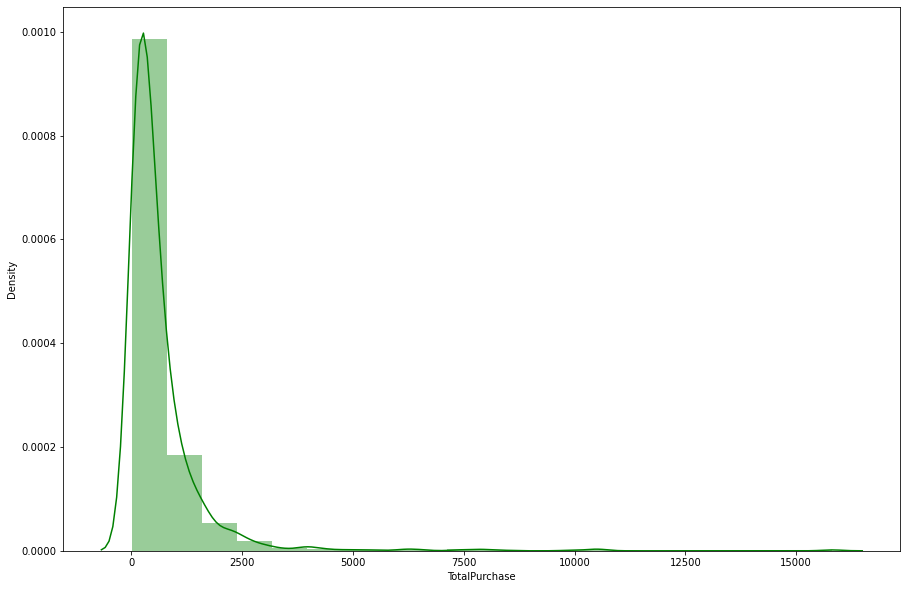

In [22]:
plt.figure(figsize = (15,10))
sns.distplot(df_main['TotalPurchase'], bins=20, color='green')
plt.show()

**Normal Distribution test by hypothetical testing**

After we tested by graphics, let's use hypothetical test to double check. 

In [23]:
#Normality Test dengan Shapiro-Wilk
from scipy.stats import shapiro

#Define hypothesis
print('Hypotesis:')
print('Ho \t : Data is distributed normal')
print('Ha \t : Data is not distributed normal')

#Hypothesis testing
stat, pvalshapiro = shapiro(df_main['TotalPurchase'])
if pvalshapiro < 0.05:
    print('Ho rejected')
else:
    print('Ho accepted')

Hypotesis:
Ho 	 : Data is distributed normal
Ha 	 : Data is not distributed normal
Ho rejected


In [24]:
#example 
yearprof = df_main[['Customer', 'BuyingPrice', 'Quantity' ,'TotalPurchase']].groupby(pd.DatetimeIndex(df_main['ShippedDate']).year).sum().reset_index()
yearprof

,ShippedDate,BuyingPrice,Quantity,TotalPurchase
0,1996,11150.51,8717.0,210112.30
1,1997,28201.92,25460.0,649038.81
2,1998,19298.20,15942.0,467863.72


In [25]:
#example
yearprof = df_main[['OrderDate', 'Customer', 'TotalPurchase']].groupby(pd.DatetimeIndex(df_main['OrderDate']).year).sum().reset_index()
yearprof

,OrderDate,TotalPurchase
0,1996,226298.50
1,1997,658388.75
2,1998,442327.58


In [27]:
#Non-parametric Test
from scipy.stats import mannwhitneyu

#Define Hypothesis
print('Hypotesis')
print('Ho \t : TotalPurchase in 1997 is greater and equal to 1998.')
print('Ha \t : TotalPurchase in 1997 is lesser and equal to 1998.')

#Hypothesis Testing
stat, pvalMannwhit = mannwhitneyu(
    yearprof[yearprof['OrderDate'] == 1996]['TotalPurchase'],
    yearprof[yearprof['OrderDate'] == 1997]['TotalPurchase'],
    yearprof[yearprof['OrderDate'] == 1998]['TotalPurchase'],
    alternative='less'
)
if pvalMannwhit < 0.05:
    print('Ho rejected')
else:
    print('Ho accepted')



Hypotesis
Ho 	 : TotalPurchase in 1997 is greater and equal to 1998.
Ha 	 : TotalPurchase in 1997 is lesser and equal to 1998.
Ho accepted


## **Sales Growth by Customer Order**

As I mentioned earlier that my key focus is ``Customer``, I would like to see the condition of 'Sales Growth' based on the amount of orders by customers. However, I need to collect more data from SQL before I am moving forward to the analysis process.

In [28]:
#collect data from SQL

total_sold = df_sql('''
SELECT c.CompanyName, o.OrderDate AS Year,
   SUM(ROUND(od.UnitPrice * od.Quantity,2)) AS TotalSold
FROM Customers AS c
INNER JOIN Orders AS o
   ON c.CustomerID = o.CustomerID
INNER JOIN orderdetails AS od
   ON o.OrderID = od.OrderID
GROUP BY o.OrderDate, c.CompanyName
  ''')
total_sold.head()

,CompanyName,Year,TotalSold
0,Alfreds Futterkiste,1997-08-25,1086.00
1,Alfreds Futterkiste,1997-10-03,878.00
2,Alfreds Futterkiste,1997-10-13,330.00
3,Alfreds Futterkiste,1998-01-15,851.00
4,Alfreds Futterkiste,1998-03-16,491.20


In [36]:
yearsale = total_sold[['CompanyName', 'TotalSold']].groupby(pd.DatetimeIndex(total_sold['Year']).year).sum()
yearsale


,TotalSold
Year,
1996,226298.50
1997,658388.75
1998,469771.34


In [30]:
#check info data
total_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CompanyName  823 non-null    object        
 1   Year         823 non-null    datetime64[ns]
 2   TotalSold    823 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 19.4+ KB


In [31]:
#redefine TotalSold as numeric type
total_sold['TotalSold'] = total_sold['TotalSold'].astype('float')

In [32]:
#check TotalSoal distribution 
fig = px.box(total_sold, x="TotalSold")
fig.show()

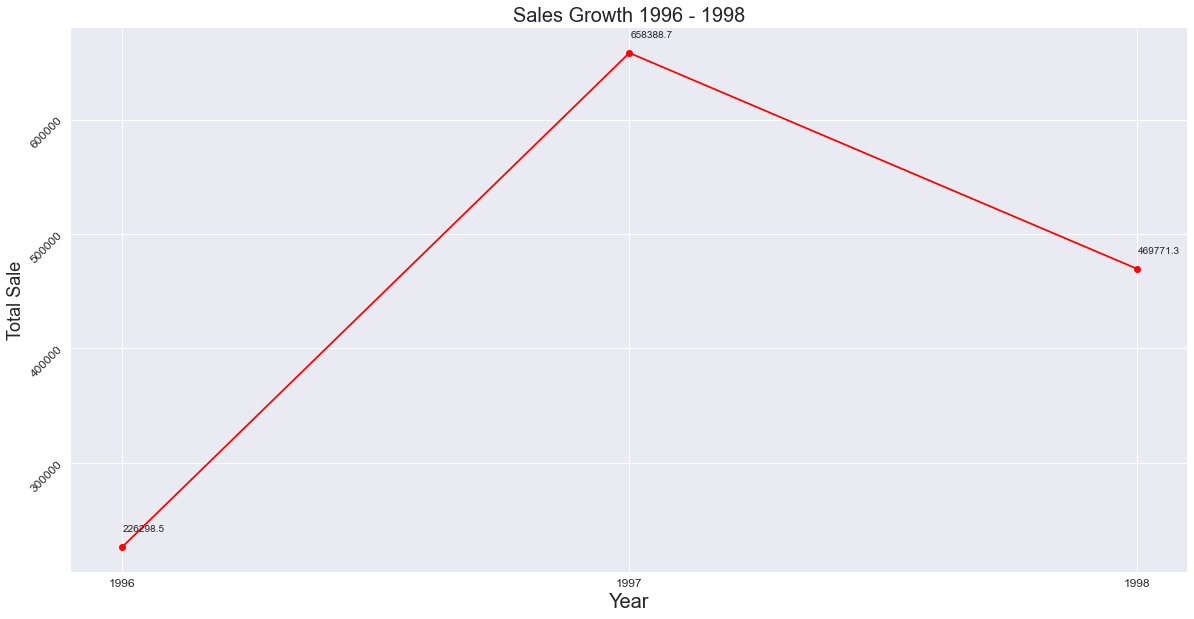

In [37]:
# Line Plot Year By Year Sales Amount

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearsale.index, yearsale['TotalSold'], 'ro-')
plt.title('Sales Growth 1996 - 1998', size = 20)
plt.xlabel('Year', size = 20)
plt.ylabel('Total Sale', size = 18)
plt.xticks(yearsale.index, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearsale.index, round(yearsale['TotalSold'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

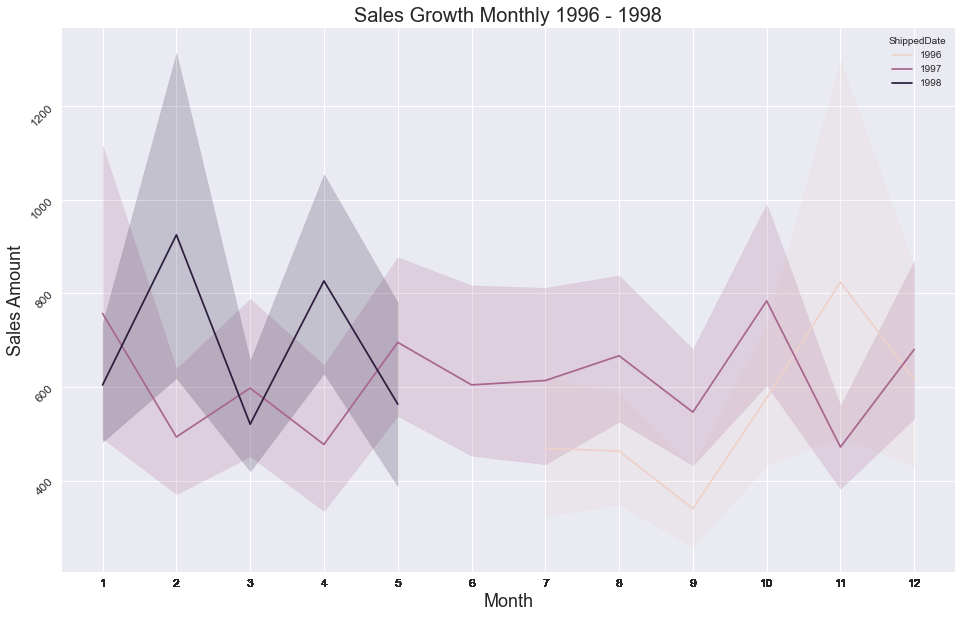

In [87]:
# Line Plot Profit Each Month

plt.figure(figsize=(16,10))
sns.lineplot(data=df_main, x=pd.DatetimeIndex(df_main['ShippedDate']).month, y='TotalPurchase', hue = pd.DatetimeIndex(df_main['ShippedDate']).year)
plt.title('Sales Growth Monthly 1996 - 1998', size = 20)
plt.xlabel('Month', size = 18)
plt.ylabel('Sales Amount', size = 18)
plt.xticks(pd.DatetimeIndex(df_main['ShippedDate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

Based on the analysis above, we can see that the highest growth of sales over the period is lied in 1997 at roughly USD 658,000. It might be because the data in 1996 was only available from July - December, and in 1998 was only between January - May so they are not as full-year complete as 1997 is. If we compare the total sales between July-December in 1996 and 1997, it can be seen the total sales in 1997 is much higher. Whereas, total sales in January - May 1997 is significantly lower than in 1998. 

## **Top 5 Loyal Costumers by Amount of Orders**

In here, I am going to use the data visualisation to get several insights that later will be used as a basic understanding before making some decisions and building strategy to get more high profit with low risk of loss. 

After we take a look the analysis in `Profit` and `Sales Growth` perspective, I would like to see more analysis about the top 5 loyal customers.

In [314]:
customer_loyal = df_main[['Customer', 'Country']].value_counts().reset_index().head()
customer_loyal.columns = ['Customer', 'Country', 'Counts']
customer_loyal

,Customer,Country,Counts
0,Save-a-lot Markets,USA,116
1,Ernst Handel,Austria,95
2,QUICK-Stop,Germany,86
3,Hungry Owl All-Night Grocers,Ireland,55
4,Berglunds snabbkp,Sweden,52


In [315]:
fig = px.bar(customer_loyal, x= 'Customer', y='Counts', color = 'Country', text_auto='.2s',
            title = 'Top 5 Loyal Costumer')
fig.show()

Based on the amount of customer orders, we can see from the graph above there are top 5 customers that are loyal to order Northwind Products as follows:

- Save-a-lot Markets, USA, order counts 116.
- Ernst Handel, Austria, counts 95
- Quick-Stop, Germany, order counts 86
- Hungry Owl-Night Grocers, Ireland, order counts 55
- Berglund snabbkp, Sweden, order counts 52

By using this information, it might be worthwhile from management to consider giving them some appreciation in order to maintain their loyalty. There are different ways to do this such as: 
- Offer Discounts
- Reward Customers
- Promote loyalty programs
- Create loyalty tiers 
- etc

## **Top 5 Customers by Total Purchase**

In [356]:
prchs_customers = df_main.groupby(['Customer'], as_index=False).agg({'TotalPurchase':'mean','OrderId':'count'}).sort_values(by='TotalPurchase', ascending=False).head()
prchs_customers

,Customer,TotalPurchase,OrderId
59,QUICK-Stop,1366.085930,86
71,Simons bistro,1278.153571,14
57,Piccolo und mehr,1141.736957,23
63,Rattlesnake Canyon Grocery,1105.897826,46
20,Ernst Handel,1085.422947,95


In [381]:
px.bar(prchs_customers, x="Customer", y="TotalPurchase", color='Customer', title = 'Top 5 Average Total Purchase by Customer 1996-1998')

The top 5 customers that made the most purchases:
1. QUICK-Stop, AVG total purchase: $1,366
2. Simons bistro, AVG total purchase:$1,278
3. Piccolo und mehr, AVG total purchase:$1,141
4. Rattlesnake Canyon Grocery, AVG total purchase:$1,105
5. Ernst Handel, AVG total purchase:$1,085

This information worth to know by the stakeholders so they are aware who are those customers that contributed to their products purchase. It might something the can be considered how to maintain their behaviour in buying the products with us. 

## **TotalPurchase by ProductLine**

Now, I would like to see the `TotalPurchase` by product category. According to the description below, you will see the complete details of each products line. Briefly to say, that the highest average TotalPurchase is Meat and Poultry. See more conclusion in the following notes below.

In [91]:
# Groupping and Aggregating
df_main[['TotalPurchase','ProductLine']].groupby('ProductLine').describe()

TotalPurchase                                                   \
                       count         mean          std    min      25%    50%   
ProductLine                                                                     
Beverages              389.0   721.292931  1814.797730  13.50  115.200  280.0   
Condiments             207.0   543.510870   518.418550  26.00  210.500  390.0   
Confections            324.0   537.950309   646.718217   7.30  149.025  349.0   
Dairy Products         355.0   697.933803   755.078742  10.00  201.600  480.0   
Grains/Cereals         191.0   501.360209   475.464927  14.00  140.000  390.0   
Meat/Poultry           169.0  1048.495858  1455.651773  22.35  230.400  524.0   
Produce                128.0   769.996484   802.212137  50.00  226.800  530.0   
Seafood                319.0   439.961066   467.428647   4.80  129.600  304.0   

                                  
                    75%      max  
ProductLine                       
Beverages        540.00  15810.0  
Condiments       650.25   3420.0  
Confections      624.60   5268.0  
Dairy Products   900.00   6050.0  
Grains/Cereals   760.00   2660.0  
Meat/Poultry    1310.00   9903.2  
Produce         1060.00   6360.0  
Seafood          570.00   3125.0

In [98]:
#grouping and aggregate 
purchase_by_product = df_main.groupby(['ProductLine'])['TotalPurchase'].mean().reset_index().sort_values('TotalPurchase', ascending=False)
purchase_by_product

,ProductLine,TotalPurchase
5,Meat/Poultry,1048.495858
6,Produce,769.996484
0,Beverages,721.292931
3,Dairy Products,697.933803
1,Condiments,543.510870
2,Confections,537.950309
4,Grains/Cereals,501.360209
7,Seafood,439.961066


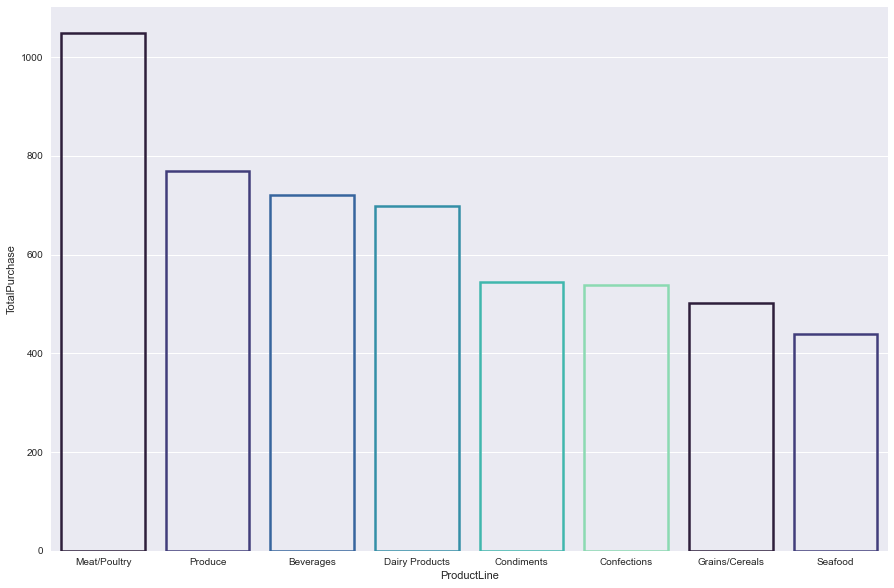

In [106]:
#figure the result in barplot
plt.figure(figsize = (15,10))
ax = sns.barplot(data = purchase_by_product, x = 'ProductLine', y = 'TotalPurchase', linewidth=2.5, facecolor=(1, 1, 1, 0),
                 edgecolor=sns.color_palette("mako"))

In here, I would like to see the total purchase by products category based on customers' transaction. The feature named 'ProductLine' refers to the product category which is a list of the product line in the database that Northwind produced. ```ProductLine``` has 8 categories which are 'Beverages', 'Condiments', 'Confections', 'Dairy Proucts', 'Grains/Cereals', 'Meat/Poultry, 'Produce', and 'Seafood'.

Of course, the highest purchase lies on Meat/Poultry category which makes sense. The average total purchase on Meat/Poutry is USD 1,048 in total compared to other category that only below $1,000. However, the maximum cost of purchase is not even from Meat/Poultry category, rather from Beverages category at $15,810 where the maximum cost on Meat/Poultry order is only below $10,000. 

When it comes to quantity that ordered by customers, the lowest number of orders rests in 'Produce' products such as fresh farm-produced crops (ie. vegetables and fruits). While, the highest order is 'Beverages' at 389 quantity. 


## **Profit Analysis**

Now let's take a look the Profit that received by Northwind over the period. First, I will create a new column called `Profit` and using Lambda function to multiply a couple of columns which are `ProfitEach` and `Quantity`.

In [108]:
df_main['Profit'] = df_main[['ProfitEach', 'Quantity']].apply(lambda x:(x['ProfitEach'] * x['Quantity']), axis = 1)
df_main.head()

,CustomerId,Customer,City,Country,Salesperson,OrderDate,OrderId,RequiredDate,ShippedDate,Quantity,...,TotalPurchase,ProfitEach,ProductName,ProductLine,QuantityPerUnit,BuyingPrice,Supplier,RemainingStock,ProcessingDays,Profit
0,ALFKI,Alfreds Futterkiste,Berlin,Germany,Suyama,1997-08-25,10643.0,1997-09-22,1997-09-02,15.0,...,684.0,0.0,Rssle Sauerkraut,Produce,25 - 825 g cans,45.6,Plutzer Lebensmittelgromrkte AG,26.0,20 days,0.0
1,ALFKI,Alfreds Futterkiste,Berlin,Germany,Suyama,1997-08-25,10643.0,1997-09-22,1997-09-02,21.0,...,378.0,0.0,Chartreuse verte,Beverages,750 cc per bottle,18.0,Aux joyeux ecclsiastiques,69.0,20 days,0.0
2,ALFKI,Alfreds Futterkiste,Berlin,Germany,Suyama,1997-08-25,10643.0,1997-09-22,1997-09-02,2.0,...,24.0,0.0,Spegesild,Seafood,4 - 450 g glasses,12.0,Lyngbysild,95.0,20 days,0.0
3,ALFKI,Alfreds Futterkiste,Berlin,Germany,Peacock,1997-10-03,10692.0,1997-10-31,1997-10-13,20.0,...,878.0,0.0,Vegie-spread,Condiments,15 - 625 g jars,43.9,"Pavlova, Ltd.",24.0,18 days,0.0
4,ALFKI,Alfreds Futterkiste,Berlin,Germany,Peacock,1997-10-13,10702.0,1997-11-24,1997-10-21,6.0,...,60.0,0.0,Aniseed Syrup,Condiments,12 - 550 ml bottles,10.0,Exotic Liquids,-57.0,34 days,0.0


In [119]:
#Distribution test by NormalTest
from scipy.stats import normaltest

print('Hypotesis:')
print('Ho \t : Data is distributed normal')
print('Ha \t : Data is not distributed normal')

#Hypothesis testing
stat, pvalnormal = normaltest(df_main['Profit'])
if pvalnormal < 0.05:
    print(f'Pvalue: {pvalnormal}. Ho rejected. Data is not normal distribution')
else:
    print(f'Pvalue: {pvalnormal}. Ho accepted. Data is normal distribution')


Hypotesis:
Ho 	 : Data is distributed normal
Ha 	 : Data is not distributed normal
Pvalue: 0.0. Ho rejected. Data is not normal distribution


<AxesSubplot:xlabel='Profit'>

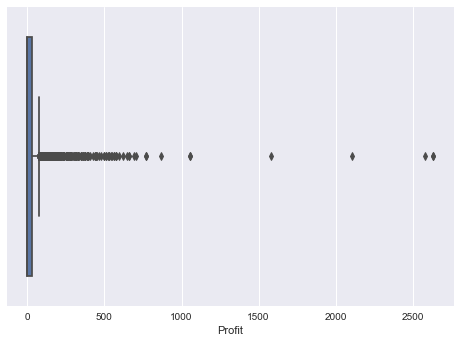

In [211]:
#see where the distribution skewed by using boxplot
sns.boxplot(data=df_main, x='Profit')

In [185]:
df_main2 = df_main.copy()


In [186]:
df_main2['ProcessingDays'] = pd.to_numeric(df_main2['ProcessingDays'].dt.days, downcast='integer')

In [226]:
#See profit the received from customers

profit_by_customer = df_main2.groupby(['Customer', 'Country', 'TotalPurchase','ProductLine', 'ProcessingDays', 'BuyingPrice', 'Quantity'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(500)
profit_by_customer

,Customer,Country,TotalPurchase,ProductLine,ProcessingDays,BuyingPrice,Quantity,Profit
1271,Piccolo und mehr,Austria,10540.0,Beverages,16,263.5,50.0,2635.0
1741,Simons bistro,Denmark,10540.0,Beverages,16,263.5,50.0,2635.0
1166,Mre Paillarde,Canada,10329.2,Beverages,24,263.5,49.0,2582.3
1428,Queen Cozinha,Brazil,8432.0,Beverages,23,263.5,40.0,2108.0
1483,Rattlesnake Canyon Grocery,USA,6324.0,Beverages,26,263.5,30.0,1581.0
...,...,...,...,...,...,...,...,...
1025,Lazy K Kountry Store,USA,147.0,Seafood,8,18.4,10.0,37.0
79,B's Beverages,UK,147.0,Seafood,20,18.4,10.0,37.0
315,Die Wandernde Kuh,Germany,145.6,Produce,18,45.6,4.0,36.8
1894,Vaffeljernet,Denmark,145.6,Condiments,6,13.0,14.0,36.4


In [227]:
fig = px.scatter(profit_by_customer, x='TotalPurchase', y='Profit')
fig.show()

Without a doubt that `TotalPurchase` has positive correlation with `Profit`. Seeing from the dot distribution in the graph above, the profit is spread between the total purchase at $98 and $2808. We can conclude that any products within this range of `TotalPurchase` amount have higher needs by the customers. Let's take a look for the next analysis.

In [230]:
profit_by_customer_scattered = df_main2.groupby(['Customer', 'Country', 'TotalPurchase', 'ProductLine', 'ProcessingDays', 'BuyingPrice', 'Quantity'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

profit_by_customer_scattered

,Customer,Country,TotalPurchase,ProductLine,ProcessingDays,BuyingPrice,Quantity,Profit
1271,Piccolo und mehr,Austria,10540.0,Beverages,16,263.50,50.0,2635.0
1741,Simons bistro,Denmark,10540.0,Beverages,16,263.50,50.0,2635.0
1166,Mre Paillarde,Canada,10329.2,Beverages,24,263.50,49.0,2582.3
1428,Queen Cozinha,Brazil,8432.0,Beverages,23,263.50,40.0,2108.0
1483,Rattlesnake Canyon Grocery,USA,6324.0,Beverages,26,263.50,30.0,1581.0
...,...,...,...,...,...,...,...,...
816,Hungry Owl All-Night Grocers,Ireland,421.0,Condiments,23,21.05,20.0,0.0
815,Hungry Owl All-Night Grocers,Ireland,420.0,Beverages,22,14.00,30.0,0.0
811,Hungry Owl All-Night Grocers,Ireland,289.5,Seafood,22,9.65,30.0,0.0
810,Hungry Owl All-Night Grocers,Ireland,280.0,Grains/Cereals,21,14.00,20.0,0.0


In [235]:
purchase_profit_range = profit_by_customer_scattered[(profit_by_customer_scattered['Profit'] > 40.0) & (profit_by_customer_scattered['Profit'] < 770)].sort_values('Profit')
purchase_profit_range

,Customer,Country,TotalPurchase,ProductLine,ProcessingDays,BuyingPrice,Quantity,Profit
807,Hungry Owl All-Night Grocers,Ireland,163.2,Dairy Products,-7,34.00,6.0,40.80
1753,Split Rail Beer & Ale,USA,165.6,Seafood,34,25.89,8.0,41.52
885,Kniglich Essen,Germany,165.6,Seafood,23,25.89,8.0,41.52
1830,Toms Spezialitten,Germany,167.4,Produce,37,23.25,9.0,41.85
886,Kniglich Essen,Germany,167.4,Produce,9,23.25,9.0,41.85
...,...,...,...,...,...,...,...,...
1805,Suprmes dlices,Belgium,2592.0,Confections,26,81.00,40.0,648.00
756,HILARION-Abastos,Venezuela,2640.0,Dairy Products,25,55.00,60.0,660.00
1481,Rattlesnake Canyon Grocery,USA,2640.0,Dairy Products,26,55.00,60.0,660.00
1482,Rattlesnake Canyon Grocery,USA,2758.0,Confections,17,49.30,70.0,693.00


In [237]:
fig = px.bar(purchase_profit_range, x='Profit', y='ProductLine')
fig.show()

In conclusion, the most product that gave more profits to the company is: `Dairy Product`, `Confections`, `Meat Poultry`. It can be something to consider to give more discount to customers with faster ship delivery for these products. However, let's take a look if any correlation between those variables towards profit. 

<AxesSubplot:>

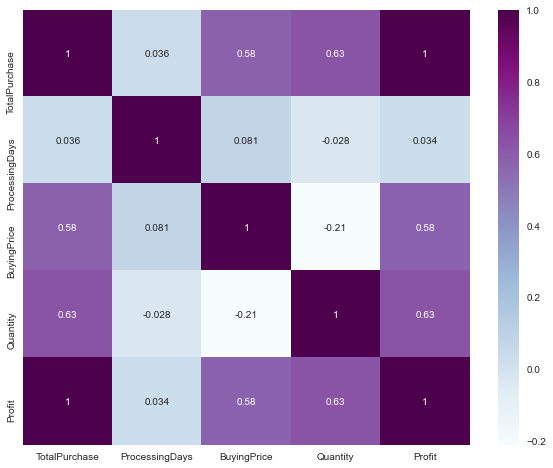

In [246]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(profit_by_customer.corr('spearman'), cmap="BuPu", annot=True)
	

The only variables that have a fair correlation toward profit is `BuyingPrice` with **0.58**, `Quantity` with **0.63**, and `TotalPurchase` is the highest one at **1.00**. In the first place, I was wondering if `ProcessingDays` have affected towards `TotalPurchase` and `Profit`. It seems they don't have any correlation to each other no matter how fast or slow the processing days of delivery time for the product the requested.

## **Customer Orders by Category & Country**

After we have knowledge who are the loyal customers are, it might be more helpful to find which products that are most ordered of each customers. 

In [343]:
customer_orders = df_main[[ 'Country', 'ProductLine']].value_counts().reset_index().head(10)
customer_orders.columns = ['Country', 'ProductLine', 'Counts']
customer_orders

,Country,ProductLine,Counts
0,Germany,Dairy Products,63
1,USA,Confections,59
2,Germany,Beverages,58
3,USA,Beverages,58
4,Germany,Confections,53
5,USA,Dairy Products,51
6,Germany,Seafood,49
7,USA,Seafood,48
8,Brazil,Beverages,39
9,Brazil,Seafood,37


In [450]:
fig = px.bar(customer_orders, x = 'Country', y= 'Counts', color='ProductLine', text='ProductLine',
            title = 'Top Orders by Category & Country', width=1000, height=500)
fig.show()

In Northwind, there are several products which orderd by customers the most. Although, the products are supplied by other vendors, the flow of products order still keep going on. Now, let's take a look at the data above. About over 200 orders was completed in over the period between 1996-1998. The most ordered products by the top customers are below:

1. Dairy Products: USA and Germany
2. Confections: USA and Germany
3. Beverages: USA, Germany, and Brazil
4. Seafood: USA, Germany, and Brazil

By having these information, the company might have consideration to give more variant or elements for these top products for example: 
- Different flavours for confections
- New brand with efficient package for dairy products
- Added more beverages that have healthy ingredients
- High quality and low-fat seafood
- And so forth


## **Best-Selling Products**

Once we figured out the top products category by customer's orders count, we can discover deeper findings on the **Best Selling Products** by quantities amount that ordered by the customers over the period.

In [454]:
product_quant = df_main[['ProductLine', 'ProductName']].groupby(['ProductLine']).count().sort_values('ProductName')
product_quant

,ProductName
ProductLine,
Produce,128
Meat/Poultry,169
Grains/Cereals,191
Condiments,207
Seafood,319
Confections,324
Dairy Products,355
Beverages,389


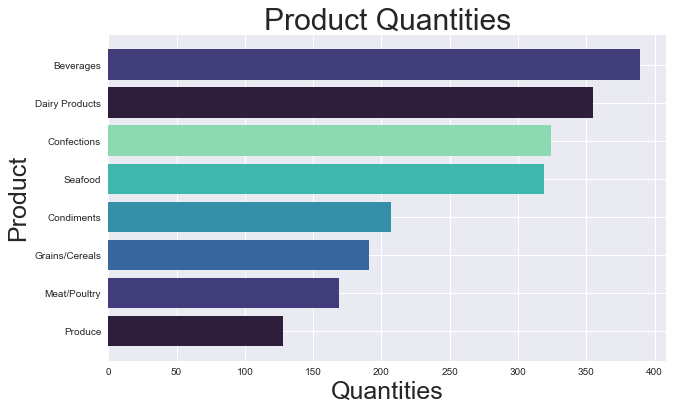

In [455]:
x = product_quant.index
y = product_quant['ProductName']

plt.style.use('seaborn')
plt.figure(figsize = (10,6))
plt.barh(x,y, color = sns.color_palette('mako'))
plt.title('Product Quantities', size = 30)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

It can be seen that the top 3 most ordered products are Beverages, Daily Products, and Confections. These three products might be grouped as non-substantial foods which are normal or generally consumed in Europe and USA. This is a natural reason why these three products are the most consumed.

Seeing this situation, the company can make the production of Beverages, Dairy Products, and confections a priority production. But firstly, we need to do some research on each countries to determine the remaining stock that align with the proportional demand.

If you see that there are not too many enthusiasts on 'Produce' (about 125 orders for a year), the company must at least take clear steps. The company can carry out several policies, such as stopping produce production or trying to offer this line product to the right countries, such as Germany, France, USA, or countries that consume more 'Produce' products.

## **Product Revenue by Salesperson**

In this analysis, I need to collect new data from SQL database. In here, I will join employee table with order, ``orderdetails`` and ``customer`` table in order to find which salespersons who manage the customers and how much the revenue they earned from their sales. 

In [350]:
#CTE

cte_emp = df_sql('''
   WITH employee_sales AS(
       SELECT e.EmployeeID, e.FirstName, e.LastName, e.Title, e.HireDate, e.Country, e.salary, 
       c.CompanyName AS Client, od.Quantity, od.UnitPrice, od.Discount
       FROM employees e 
       LEFT JOIN orders o ON e.EmployeeID = o.EmployeeID 
       LEFT JOIN customers c ON o.CustomerID = c.CustomerID
       LEFT JOIN orderdetails od ON o.OrderID = od.OrderID
       ORDER BY e.salary DESC )
    SELECT * FROM employee_sales
''')
cte_emp


,EmployeeID,FirstName,LastName,Title,HireDate,Country,salary,Client,Quantity,UnitPrice,Discount
0,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Victuailles en stock,6,16.8000,0.0
1,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Victuailles en stock,15,15.6000,0.0
2,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Victuailles en stock,20,16.8000,0.0
3,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Hanari Carnes,20,10.0000,0.0
4,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Hanari Carnes,42,14.4000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2150,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,28,17.4500,0.0
2151,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,25,12.5000,0.0
2152,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,30,9.5000,0.0
2153,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,24,34.0000,0.0


In [351]:
cte_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EmployeeID  2155 non-null   int64         
 1   FirstName   2155 non-null   object        
 2   LastName    2155 non-null   object        
 3   Title       2155 non-null   object        
 4   HireDate    2155 non-null   datetime64[ns]
 5   Country     2155 non-null   object        
 6   salary      2155 non-null   float64       
 7   Client      2155 non-null   object        
 8   Quantity    2155 non-null   int64         
 9   UnitPrice   2155 non-null   object        
 10  Discount    2155 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 185.3+ KB


In [352]:
cte_emp['UnitPrice'] = pd.to_numeric(cte_emp['UnitPrice'])

**New column 'Discount'**

I am trying to pull up new column of discount before we calculate the revenue.

I made a “Revenue” column by multiplying the “Quantity”, “UnitPrice”, and “Discount” columns.

In [353]:
cte_emp['Revenue'] = cte_emp['UnitPrice'] * cte_emp['Quantity'] * (1-cte_emp['Discount']) 
cte_emp

,EmployeeID,FirstName,LastName,Title,HireDate,Country,salary,Client,Quantity,UnitPrice,Discount,Revenue
0,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Victuailles en stock,6,16.80,0.0,100.8
1,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Victuailles en stock,15,15.60,0.0,234.0
2,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Victuailles en stock,20,16.80,0.0,336.0
3,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Hanari Carnes,20,10.00,0.0,200.0
4,3,Janet,Leverling,Sales Representative,1992-04-01,USA,3119.15,Hanari Carnes,42,14.40,0.0,604.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,28,17.45,0.0,488.6
2151,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,25,12.50,0.0,312.5
2152,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,30,9.50,0.0,285.0
2153,5,Steven,Buchanan,Sales Manager,1993-10-17,UK,1744.21,LINO-Delicateses,24,34.00,0.0,816.0


In [354]:
cte_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EmployeeID  2155 non-null   int64         
 1   FirstName   2155 non-null   object        
 2   LastName    2155 non-null   object        
 3   Title       2155 non-null   object        
 4   HireDate    2155 non-null   datetime64[ns]
 5   Country     2155 non-null   object        
 6   salary      2155 non-null   float64       
 7   Client      2155 non-null   object        
 8   Quantity    2155 non-null   int64         
 9   UnitPrice   2155 non-null   float64       
 10  Discount    2155 non-null   float64       
 11  Revenue     2155 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 202.2+ KB


In [357]:
top_revenue = cte_emp.groupby(['LastName','salary', 'Title','HireDate'], as_index=False).agg({'Revenue': 'sum', 'Client':'count'}).sort_values('Revenue', ascending=False).reset_index(drop=True)
top_revenue


,LastName,salary,Title,HireDate,Revenue,Client
0,Peacock,1861.08,Sales Representative,1993-05-03,250187.45,420
1,Leverling,3119.15,Sales Representative,1992-04-01,213051.30,321
2,Davolio,2954.55,Sales Representative,1992-05-01,202143.71,345
3,Fuller,2254.49,"Vice President, Sales",1992-08-14,177749.26,241
4,King,1991.55,Sales Representative,1994-01-02,141295.99,176
5,Callahan,2100.50,Inside Sales Coordinator,1994-03-05,133301.03,260
6,Dodsworth,2333.33,Sales Representative,1994-11-15,82964.00,107
7,Suyama,2004.07,Sales Representative,1993-10-17,78198.10,168
8,Buchanan,1744.21,Sales Manager,1993-10-17,75567.75,117


In [458]:
fig = px.bar(top_revenue, x = 'LastName', y='Revenue', color='Client',
            title = 'Total Revenue of each Salesperson', width=600, height=500)
fig.show()

**The top salesperson that earned high revenues are:**

1. Peacock - total revenue: $250,187.45 - total client: 420
2. Leverling - total revenue: $213,051 - total client: 321
3. Davolio - total revenue: $202,143 - total client: 345
4. Fuller - total revenue: $177,750 - total client: 241
5. King - total revenue: $141,295 - total client: 176
6. Callahan - total revenue: $133,301 - total client: 260
7. Dodsworth - total revenue: $82,964 - total client: 107
8. Suyama - total revenue: $78,198 - total client: 168
9. Buchanan - total revenue: $75,567 - total client: 117

Now, let's see if we can see if any correlations between revenue they generated towards the total clients they handled and salary they earned.

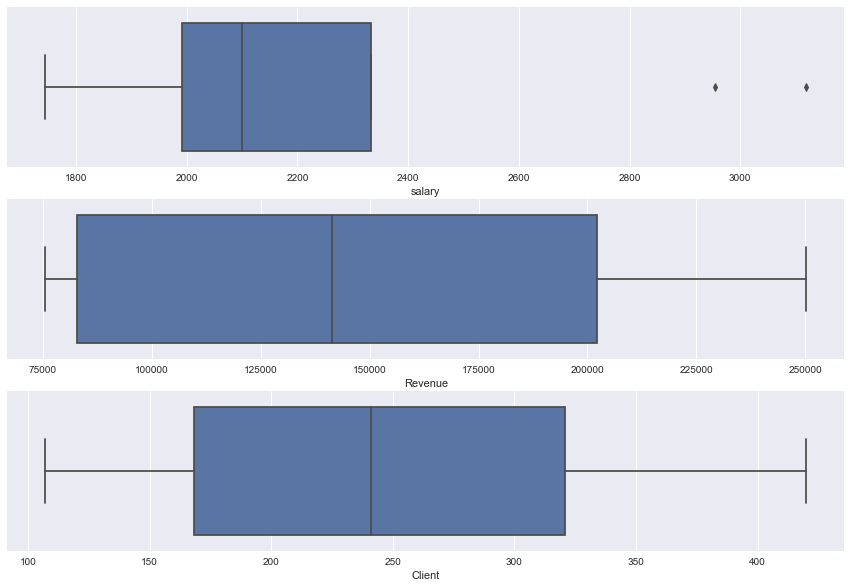

In [363]:
#check distribution by boxplot

fig, ax = plt.subplots(3,1, figsize=(15,10))

num_cols = [
    'salary', 'Revenue', 'Client'
]
for ix, col in enumerate(num_cols):
    sns.boxplot(x=top_revenue[col], ax=ax.flatten()[ix])

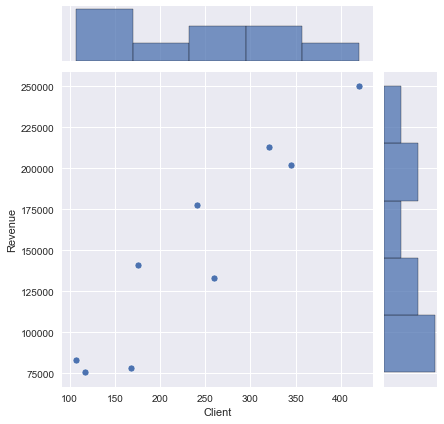

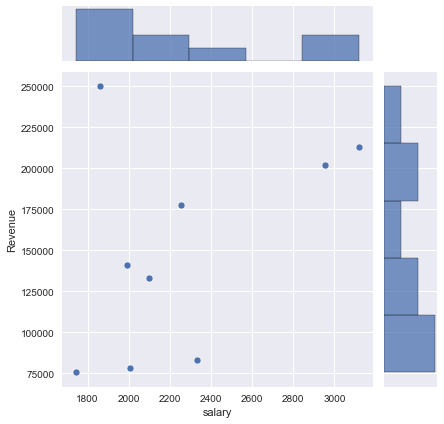

In [386]:
sns.jointplot(x = top_revenue['Client'], y = top_revenue['Revenue'])
sns.jointplot(x = top_revenue['salary'], y = top_revenue['Revenue'])

In [364]:
#check distribution by hypothesis

from scipy.stats import normaltest

cols_revenue = ['salary', 'Revenue', 'Client']
distribution = []
for i in cols_revenue:
    stats, pval = normaltest(top_revenue[i])
    if pval > 0.05:
        distribution.append('normal')
    else:
        distribution.append('not normal')
pd.DataFrame({'distribution': distribution}, index=cols_revenue)

/Users/kponeva/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



,distribution
salary,normal
Revenue,normal
Client,normal


In [365]:
#test correlation
df_corr = top_revenue.corr(method='pearson') 
df_corr

,salary,Revenue,Client
salary,1.000000,0.437471,0.382883
Revenue,0.437471,1.000000,0.942641
Client,0.382883,0.942641,1.000000


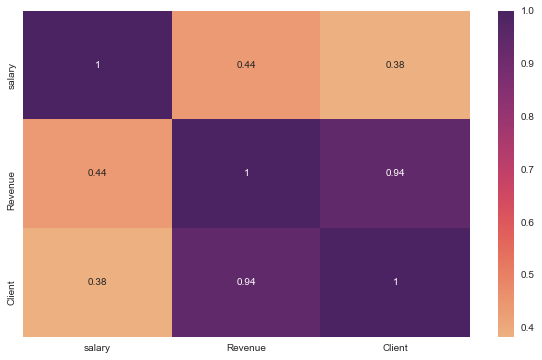

In [380]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True, cmap='flare')
plt.show()

In conclusion based on the results above are below:
1. All numeric variables under `top_revenue` are all distributed normal. It means that we can test the correlation by using `pearson`.
2. There are correlation between `Revenue` and `Client`. It means that the more clients you handled the higher revenue you will earn. In the range of 0-1, the score of this correlation is 0.94. 
3. The correlation between `salary` and `Revenue` is quite week only at 0.44. That could mean that no matter how high the salesperson's salary is, it doesn't have a significant effect on how much their revenue is. 

## **Customers Around The World**

In [467]:
country = df_main['Country'].value_counts().reset_index()
country.columns = ['Country', 'Counts']
country

,Country,Counts
0,USA,325
1,Germany,321
2,Brazil,197
3,France,180
4,UK,135
5,Austria,118
6,Venezuela,110
7,Sweden,97
8,Canada,73
9,Mexico,70


In Northwind, they have customers that cme from 20 countries where the top 5 is: USA, Germany, Brazil, France, UK, Austria

-------------
## **SUMMARY**

1. Total sales in 1997 is higher than total sales in 1996 and 1998. But still lower than 1998 of we compare the data between January - May.

2. Based on the amount of customer orders, there are top 5 customers that are loyal to order Northwind Products as follows:

    - Save-a-lot Markets, USA, order counts 116.
    - Ernst Handel, Austria, counts 95
    - Quick-Stop, Germany, order counts 86
    - Hungry Owl-Night Grocers, Ireland, order counts 55
    - Berglund snabbkp, Sweden, order counts 52

3. The top 5 customers that made the most purchases:

    - QUICK-Stop, AVG total purchase: $1,366
    - Simons bistro, AVG total purchase:$1,278
    - Piccolo und mehr, AVG total purchase:$1,141
    - Rattlesnake Canyon Grocery, AVG total purchase:$1,105
    - Ernst Handel, AVG total purchase:$1,085
    

4. The highest purchase lies on Meat/Poultry category. The average total purchase on Meat/Poutry is USD 1,048 in total compared to other category that only below $1,000.
5. The only variables that have a fair correlation toward profit is `BuyingPrice` with **0.58**, `Quantity` with **0.63**, and `TotalPurchase`.
6. It seems `ProcessingDays` don't have any correlation with `TotalPurchase` and `Profit`.
7. Without a doubt that `TotalPurchase` has positive correlation with `Profit`. Seeing from the dot distribution in the graph, the profit is spread between the total purchase at $98 and $2808.

8. The most ordered products by category and customers are below: Dairy Products, Confection, Beverages, and Seafood
9. The top 3 most ordered products by orders amount are Beverages, Daily Products, and Confections.
10. The top 5 salesperson that earned high revenues with total client they handled are Peacock (420), Leverling(321), Devolio(345), Fuller(241), and King(176).
11. There are correlation between `Revenue` and `Client`. It means that the more clients the salesperson they handled the higher revenue you will earn. In the range of 0-1, the score of this correlation is 0.94. 
3. The correlation between `salary` and `Revenue` is quite week only at 0.44. That could mean that no matter how high the salesperson's salary is, it doesn't have a significant effect on how much their revenue is. 